# Different ways to find luminosity density

As we explained elsewhere, we calculated the star formation rate density from the luminosity function. To do so, we first need to find the luminosity density by integrating the luminosity function as follows:

$$\rho(>L_{min}) = \int_{L_{min}}^\infty L \phi(L) dL$$

Here, the lower limit of the integration is poorly defined till now. Until now, we have been using $L_{min} = 0.03L_*$ following Madau & Dickinson (2014). However, this limit is, since $L_*$ varies over redshift, is not constant over cosmic history. Plus, it is not related to some physical property of a galaxy. We want to change this by relating this lower limit of integration to the star formation rate of the galaxy. In doing so, we shall use the same conversion factor from Madau & Dickinson (2014),

$$\psi = \kappa_{FUV} \times \rho$$

Here, the symbols have their usual meanings (Note that we are corrently demonstrating for FUV only). We find that the limit of $0.03L_*$ corresponds to $\sim 0.35 M_\odot \ year^{-1}$, using this conversion factor. To find the star formation rate density more accurately, we want to decrease the lower limit of integration. In the present work, we illustrate the case for the star formation rate of $0.35 M_\odot \ year^{-1}$, $0.1 M_\odot \ year^{-1}$, $0.01 M_\odot \ year^{-1}$, $0.001 M_\odot \ year^{-1}$, $0.0001 M_\odot \ year^{-1}$ and $0.00001 M_\odot \ year^{-1}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as con
import astropy.units as u
from scipy.optimize import minimize as mz
from scipy.optimize import curve_fit as cft
import utils as utl
import os

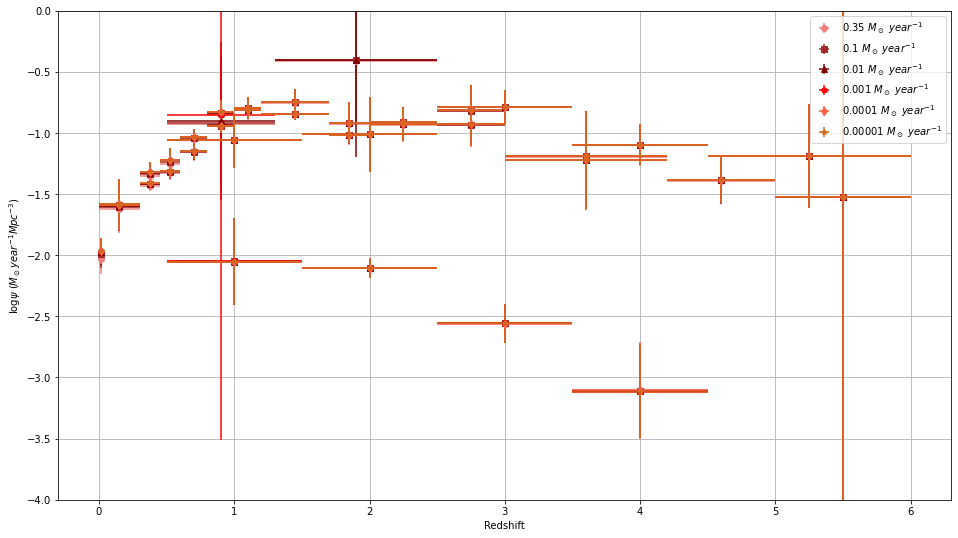

In [2]:
p1 = os.getcwd() + '/Diff_lim_IR/'

# Different limits
lims = np.array([r'$0.35 \ M_\odot \ year^{-1}$', r'$0.1 \ M_\odot \ year^{-1}$', r'$0.01 \ M_\odot \ year^{-1}$', r'$0.001 \ M_\odot \ year^{-1}$', r'$0.0001 \ M_\odot \ year^{-1}$', r'$0.00001 \ M_\odot \ year^{-1}$'])

# For 0.35 M_sun year-1
zd035, zu035, sfr035, sfre035 = np.loadtxt(p1 + 'sfrd_ir_new_0.35.dat', usecols=(1,2,3,4), unpack=True)
zcen035 = (zd035 + zu035)/2
zup035, zdo035 = np.abs(zu035 - zcen035), np.abs(zcen035 - zd035)
# For 0.1 M_sun year-1
zd_1, zu_1, sfr_1, sfre_1 = np.loadtxt(p1 + 'sfrd_ir_new_0.1.dat', usecols=(1,2,3,4), unpack=True)
zcen_1 = (zd_1 + zu_1)/2
zup_1, zdo_1 = np.abs(zu_1 - zcen_1), np.abs(zcen_1 - zd_1)
# For 0.01 M_sun year-1
zd_2, zu_2, sfr_2, sfre_2 = np.loadtxt(p1 + 'sfrd_ir_new_0.01.dat', usecols=(1,2,3,4), unpack=True)
zcen_2 = (zd_2 + zu_2)/2
zup_2, zdo_2 = np.abs(zu_2 - zcen_2), np.abs(zcen_2 - zd_2)
# For 0.001 M_sun year-1
zd_3, zu_3, sfr_3, sfre_3 = np.loadtxt(p1 + 'sfrd_ir_new_0.001.dat', usecols=(1,2,3,4), unpack=True)
zcen_3 = (zu_3 + zd_3)/2
zup_3, zdo_3 = np.abs(zu_3 - zcen_3), np.abs(zcen_3 - zd_3)
# For 0.0001 M_sun year-1
zd_4, zu_4, sfr_4, sfre_4 = np.loadtxt(p1 + 'sfrd_ir_new_0.0001.dat', usecols=(1,2,3,4), unpack=True)
zcen_4 = (zd_4 + zu_4)/2
zup_4, zdo_4 = np.abs(zu_4 - zcen_4), np.abs(zcen_4 - zd_4)
# For 0.00001 M_sun year-1
zd_5, zu_5, sfr_5, sfre_5 = np.loadtxt(p1 + 'sfrd_ir_new_0.00001.dat', usecols=(1,2,3,4), unpack=True)
zcen_5 = (zd_5 + zu_5)/2
zup_5, zdo_5 = np.abs(zu_5 - zcen_5), np.abs(zcen_5 - zd_5)

cols = np.array(['lightcoral', 'brown', 'maroon', 'red', 'tomato', 'chocolate'])
shp = np.array(['o', 's', '^', 'p', 'd', '*'])

# Redshifts
zcen_all = [zcen035, zcen_1, zcen_2, zcen_3, zcen_4, zcen_5]
zup_all = [zup035, zup_1, zup_2, zup_3, zup_4, zup_5]
zdo_all = [zdo035, zdo_1, zdo_2, zdo_3, zdo_4, zdo_5]

# All SFRDs in one array
sfr_all = [sfr035, sfr_1, sfr_2, sfr_3, sfr_4, sfr_5]
sfre_all = [sfre035, sfre_1, sfre_2, sfre_3, sfre_4, sfre_5]

log_sfr_all, log_sfre_all = [], []
for i in range(len(sfr_all)):
    ab, cd = utl.log_err(sfr_all[i], sfre_all[i])
    log_sfr_all.append(ab)
    log_sfre_all.append(cd)

plt.figure(figsize=(16,9))
for i in range(len(lims)):
    plt.errorbar(zcen_all[i], log_sfr_all[i], xerr=[zup_all[i], zdo_all[i]], yerr=log_sfre_all[i], fmt='.', marker=shp[i], c=cols[i], label=lims[i])

plt.xlabel('Redshift')
plt.ylabel(r'$\log{\psi}$ ($M_\odot year^{-1} Mpc^{-3}$)')
plt.grid()
plt.ylim([-4.0, 0])
plt.legend(loc='best')

Well, of course, it looks a bit crowdy --- there are too many points in it. To see the overall pattern, we fit a function to these data points, and see how the overall trend looks like. As usual, we use the best fitted function from Madau & Dickinson (2014),

$$ \psi(z) = A \frac{(1+z)^{B}}{1 + [(1+z)/C]^{D}} M_\odot \ year^{-1} Mpc^{-3}$$

here, $A$, $B$, $C$ and $D$ are variables.

We use `scipy.optimize.minimize` function to perform this task. The idea is to compute the maximum likelihood function.

ipykernel_launcher:4: RuntimeWarning: invalid value encountered in power
ipykernel_launcher:3: RuntimeWarning: overflow encountered in power


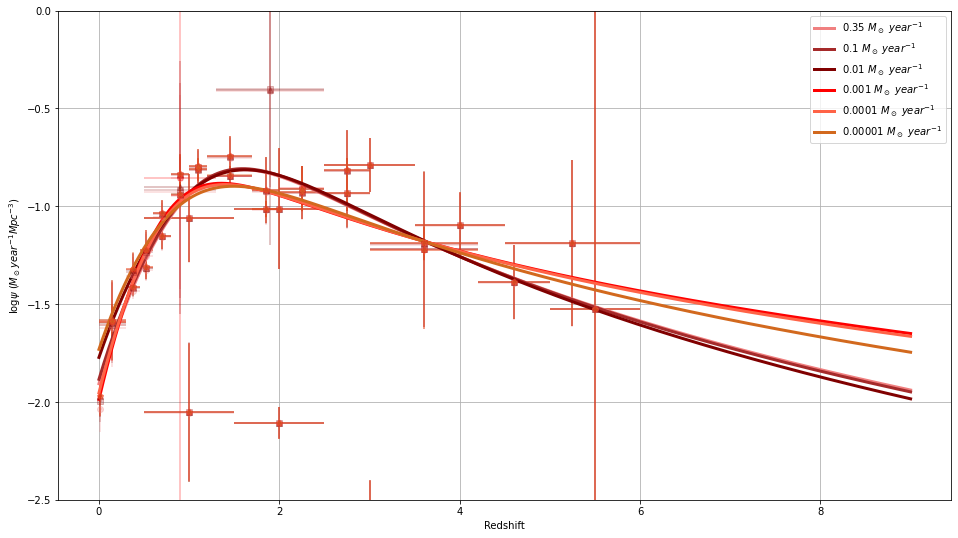

In [3]:
# New model
def psi_new(z, aa, bb, cc, dd):
    ab = (1+z)**bb
    cd = ((1+z)/cc)**dd
    ef = aa*ab/(1+cd)
    return ef

# Negative likelihood function
def min_log_likelihood(x, zcen, sfrd11, sfrd_err11):
    model = psi_new(zcen, x[0], x[1], x[2], x[3])
    chi2 = (sfrd11 - model)#/sfrd_err11
    chi22 = np.sum(chi2**2)
    yy = 0.5*chi22 #+ np.sum(np.log(sfrd_err11))
    return yy

# Negative likelihood function
def min_log_likelihood1(x, zcen, sfrd11, sfrd_err11):
    model = psi_new(zcen, x[0], x[1], x[2], x[3])
    chi2 = (sfrd11 - model)/sfrd_err11
    chi22 = np.sum(chi2**2)
    yy = 0.5*chi22 + np.sum(np.log(sfrd_err11))
    return yy

best_fit_params = []
best_fit_params1 = []
for i in range(len(lims)):
    xinit1 = np.array([0.01, 3., 3., 6.])
    #xinit, _ = cft(psi_new, sfr_all[i], sfre_all[i], p0=xinit1, maxfev=1000000)
    soln = mz(min_log_likelihood, xinit1, method='L-BFGS-B', args=(zcen_all[i], sfr_all[i], sfre_all[i]))
    soln1 = mz(min_log_likelihood1, xinit1, method='Nelder-Mead', args=(zcen_all[i], sfr_all[i], sfre_all[i]))
    #print(soln.success)
    #print(soln.x)
    best_fit_params.append(soln.x)
    best_fit_params1.append(soln1.x)

znew = np.linspace(0,9,1000)

plt.figure(figsize=(16,9))
for i in range(len(lims)):
    plt.errorbar(zcen_all[i], log_sfr_all[i], xerr=[zup_all[i], zdo_all[i]], yerr=log_sfre_all[i], fmt='.', marker=shp[i], c=cols[i], alpha=0.3)
    best_fit_func = psi_new(znew, *best_fit_params[i])
    log_best_fit = np.log10(best_fit_func)
    plt.plot(znew, log_best_fit, label=lims[i], lw=3, c=cols[i])

plt.xlabel('Redshift')
plt.ylabel(r'$\log{\psi}$ ($M_\odot year^{-1} Mpc^{-3}$)')
plt.grid()
plt.ylim([-2.5, 0])
plt.legend(loc='upper right')

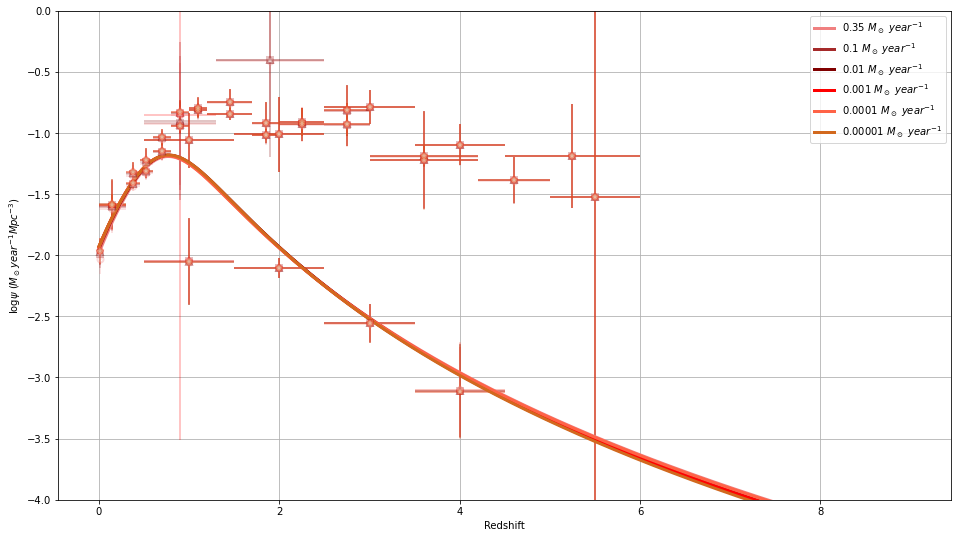

In [4]:
plt.figure(figsize=(16,9))
for i in range(len(lims)):
    plt.errorbar(zcen_all[i], log_sfr_all[i], xerr=[zup_all[i], zdo_all[i]], yerr=log_sfre_all[i], fmt='.', marker=shp[i], c=cols[i], mfc='white', mew=2, alpha=0.3)
    best_fit_func = psi_new(znew, *best_fit_params1[i])
    log_best_fit = np.log10(best_fit_func)
    plt.plot(znew, log_best_fit, label=lims[i], lw=3, c=cols[i])

plt.xlabel('Redshift')
plt.ylabel(r'$\log{\psi}$ ($M_\odot year^{-1} Mpc^{-3}$)')
plt.grid()
plt.ylim([-4.0, 0])
plt.legend(loc='upper right')

Well, it looks nice! I would comment on two things here: Towards the higher redshifts, the uncertainties in SFRD increases with decreasing the value of the lower integration limit. Hence, the best-fitted curves are not a good representatives of data at higher redshifts. Keeping this in mind, it is observed that, towards the higher redshifts, the star formation rate density increases with decrement in the lower integration limit.

Another thing that can be observed clearly from the above figure is the location of the peak star formation rate. It can be seen from the figure that, as we decrease the integration limit, the peak star formation rate moves towards the lower redshifts. Just by looking we might say that it is converging around redshift slightly lower than 2.

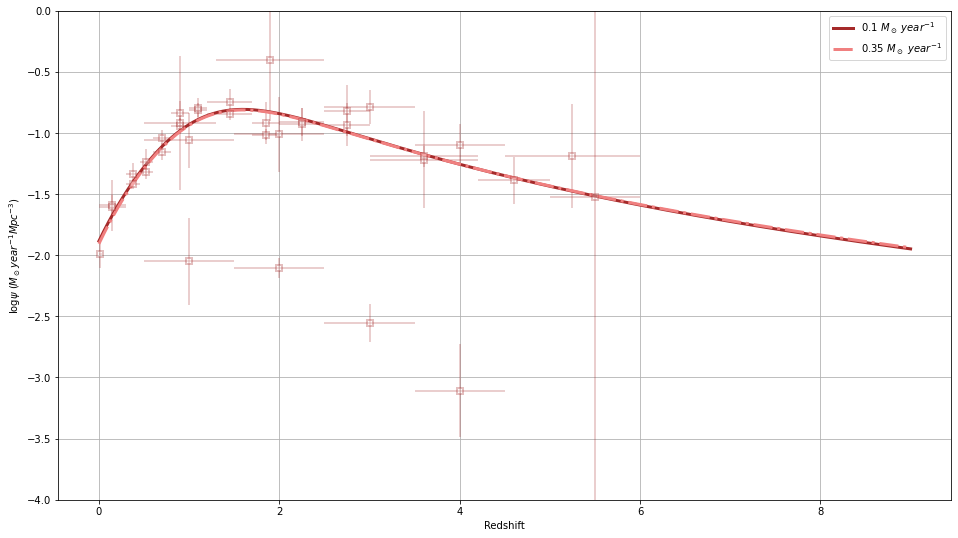

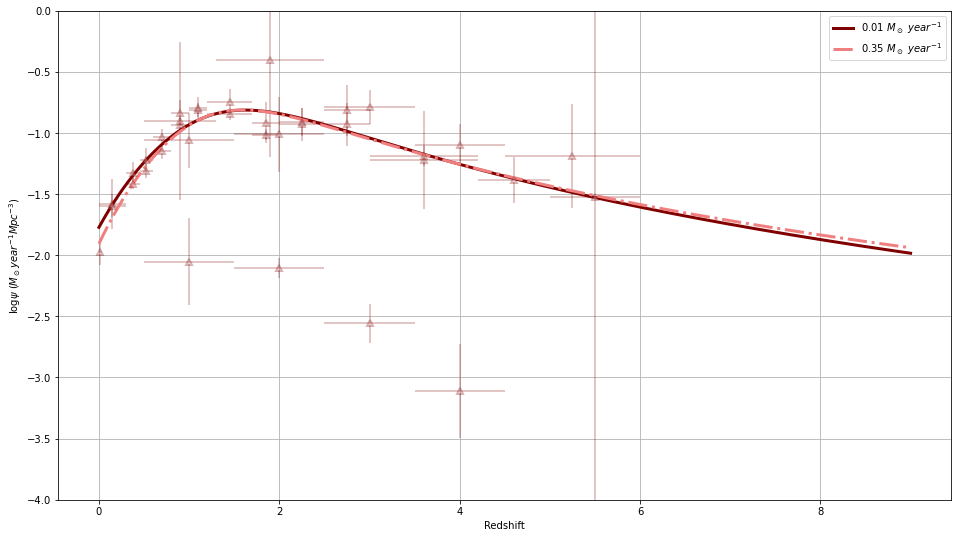

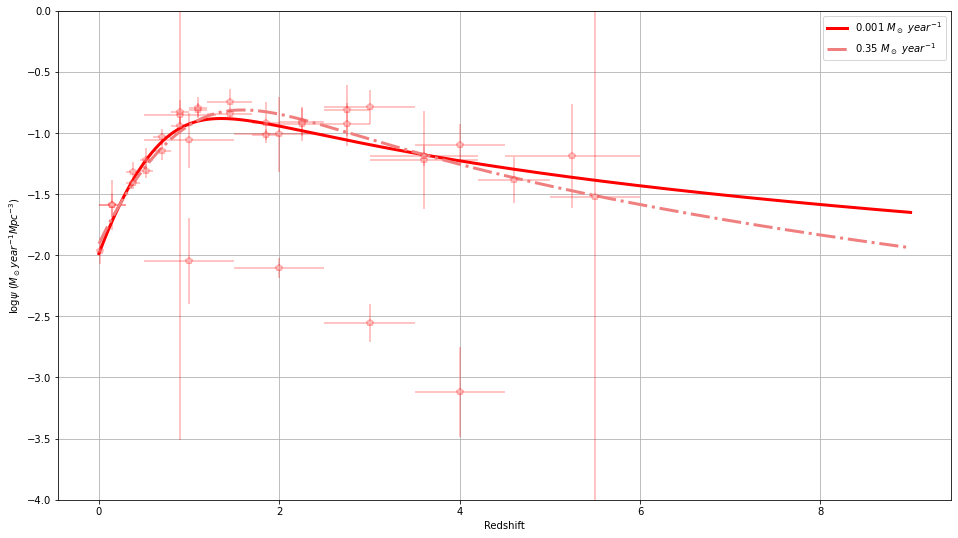

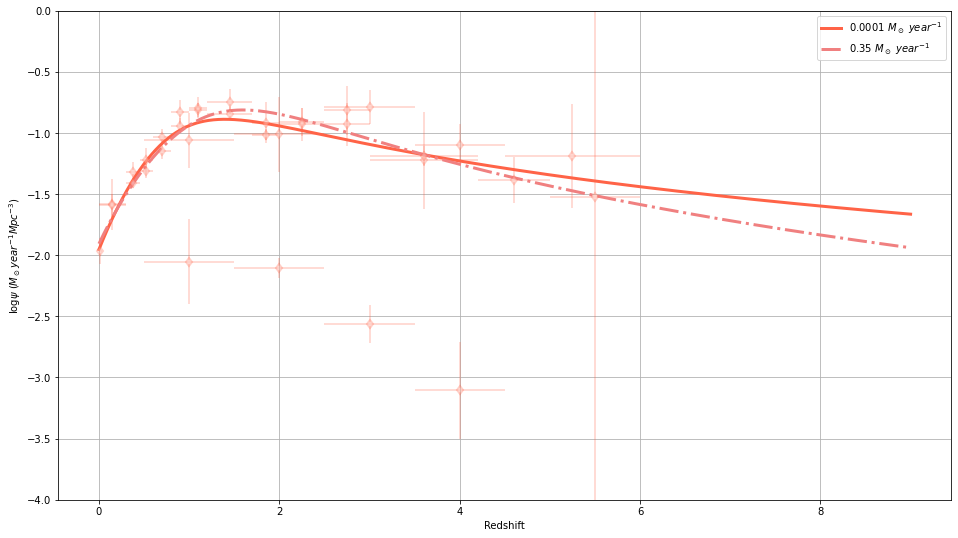

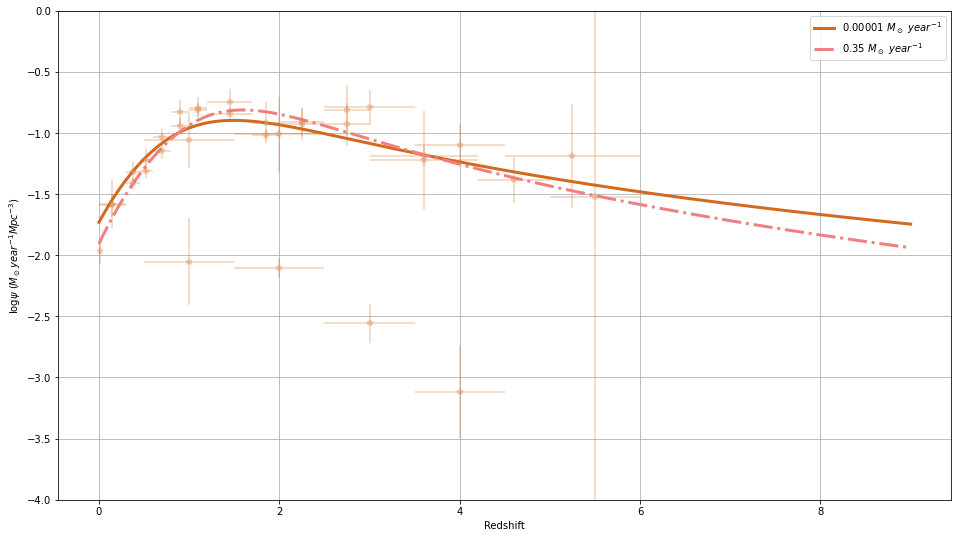

In [5]:
for i in range(len(lims)-1):
    plt.figure(figsize=(16,9))
    plt.errorbar(zcen_all[i+1], log_sfr_all[i+1], xerr=[zup_all[i+1], zdo_all[i+1]], yerr=log_sfre_all[i+1], fmt='.', marker=shp[i+1], c=cols[i+1], mfc='white', mew=2, alpha=0.3)
    best_fit_func = psi_new(znew, *best_fit_params[i+1])
    log_best_fit = np.log10(best_fit_func)
    plt.plot(znew, log_best_fit, label=lims[i+1], lw=3, c=cols[i+1])
    #
    best_fit_func0 = psi_new(znew, *best_fit_params[0])
    log_best_fit0 = np.log10(best_fit_func0)
    plt.plot(znew, log_best_fit0, label=lims[0], lw=3, c=cols[0], ls='-.')
    #
    plt.xlabel('Redshift')
    plt.ylabel(r'$\log{\psi}$ ($M_\odot year^{-1} Mpc^{-3}$)')
    plt.grid()
    plt.ylim([-4.0, 0])
    plt.legend(loc='upper right')
    plt.show()